In [ ]:
import pandas as pd

from techminer.preparation import import_raw_datafile

!rm -rf ./datastore/datastore.csv

import_raw_datafile(filepath="./raw-data/scopus.csv", filetype="scopus", datastorepath="./datastore")
# wos_df = load_file(filepath="techminer/tests/data/savedrecs.txt", filetype="wos", datastorepath="./datastore")
# dim_df = load_file(filepath="techminer/tests/data/dimensions.csv", filetype="dimensions", datastorepath="./datastore")



In [ ]:
from techminer.preparation import process_datastore

process_datastore(datastorepath="./datastore")

In [ ]:
from techminer.preparation.apply_keywords_thesaurus import apply_keywords_thesaurus

# Ok!
apply_keywords_thesaurus(datastorepath="./datastore")

In [ ]:
from techminer.preparation.apply_institutions_thesaurus import apply_institutions_thesaurus

# Ok!
apply_institutions_thesaurus(datastorepath="./datastore")

In [ ]:
from techminer.analysis.bradford import Bradford

Bradford(datastorepath="./datastore").plot(max_items=8, cmap='Blues', figsize=(8, 5), fontsize=9)

In [ ]:
Bradford(datastorepath="./datastore").sources_

In [ ]:
from techminer.analysis.top_documents import TopDocuments

TopDocuments(datastorepath="./datastore").detailed_

In [ ]:
from techminer.analysis.top_documents import TopDocuments

TopDocuments(datastorepath="./datastore").print()

In [ ]:
from techminer.analysis.core_authors import CoreAuthors

CoreAuthors(datastorepath="./datastore").table_

In [ ]:
from techminer.analysis.core_authors import CoreAuthors

CoreAuthors(datastorepath="./datastore").plot(figsize=(8, 4))

In [ ]:
from techminer.analysis.core_sources import CoreSources

CoreSources(datastorepath="./datastore").table_

In [ ]:
from techminer.analysis.coverage import Coverage

Coverage(datastorepath="./datastore").table_

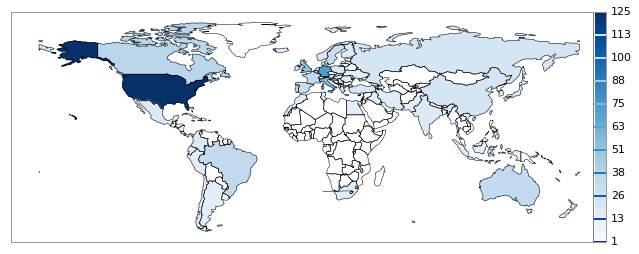

In [4]:
from techminer.analysis.worldmap import WorldMap

WorldMap(datastorepath="./datastore").plot(figsize=(9, 5), colormap='Blues')

In [ ]:
import pandas as pd

pd.read_csv("./datastore/datastore.csv").authors_id

In [ ]:
scopus_df